<h3><b>This notebook deals with the clustering of online retail data, particularly RFM principles.</b></h3>
<p>Here, <strong>R-> Recency<br>
         F-> Frequency<br>
         M-> Monetary value</strong><br>
Using these three parameters, it becomes easier to identify the most important clients, so that they can be targeted for promotions or offers.<br>
    The dataset, <b>'Online Retail dataset'</b>, is obtained from UCI Machine Learning Repository.
</p>

#### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
retail_df = pd.read_csv('OnlineRetail.csv')

#### Exploring the dataset

In [3]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
np.shape(retail_df)

(541909, 8)

#### Getting the visualization for missing data per feature

In [7]:
missing_data = pd.Series(((retail_df.isnull().sum()/len(retail_df))*100).sort_values(ascending=False))

In [8]:
missing_data

CustomerID     24.926694
Description     0.268311
InvoiceNo       0.000000
StockCode       0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
Country         0.000000
dtype: float64

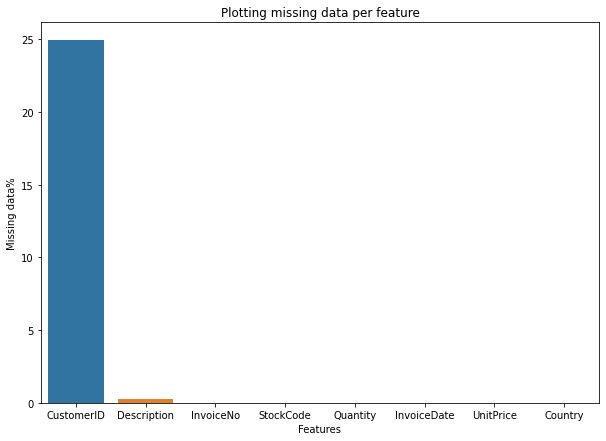

In [9]:
plt.figure(figsize=(10,7))
plt.xlabel("Features")
plt.ylabel("Missing data%")
sns.barplot(x = missing_data.index,y = missing_data)
plt.title("Plotting missing data per feature")
plt.show()

#### Since all operations have to be performed with the customerID, all missing rows have to be removed instead of being imputed.

In [10]:
retail_df.dropna(inplace=True)

In [11]:
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
country_distribution = retail_df['Country'].value_counts()

In [13]:
country_distribution = pd.Series(country_distribution.head(10))
country_distribution

United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         1877
Portugal            1480
Australia           1259
Name: Country, dtype: int64

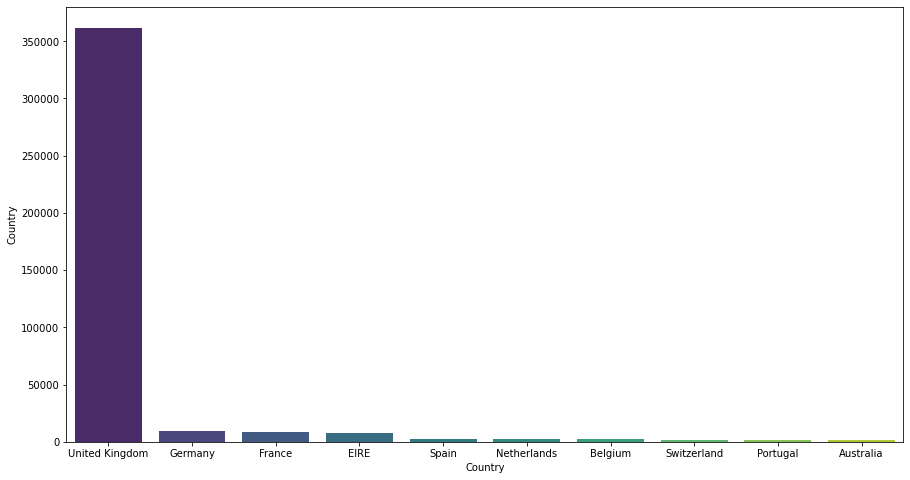

In [14]:
plt.figure(figsize=(15,8))
plt.xlabel('Country')
plt.ylabel('Count')
ax = sns.barplot(x=country_distribution.index,y=country_distribution,palette='viridis')
plt.show()

#### It can be seen that the data is imbalanced towards the UK region. Nevertheless, let us proceed with feature extraction.

#### Starting with recency, it has to be identified depending on the last date of purchase, which indicates the most recent purchase date. 

In [15]:
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'],infer_datetime_format=True)

In [16]:
retail_df['InvoiceDate']

0        2010-01-12 08:26:00
1        2010-01-12 08:26:00
2        2010-01-12 08:26:00
3        2010-01-12 08:26:00
4        2010-01-12 08:26:00
                 ...        
541904   2011-09-12 12:50:00
541905   2011-09-12 12:50:00
541906   2011-09-12 12:50:00
541907   2011-09-12 12:50:00
541908   2011-09-12 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [17]:
recent_date = max(retail_df['InvoiceDate'])

In [18]:
retail_df['recency'] = recent_date - retail_df['InvoiceDate']

In [19]:
retail_df['recency']

0        697 days 08:53:00
1        697 days 08:53:00
2        697 days 08:53:00
3        697 days 08:53:00
4        697 days 08:53:00
                ...       
541904    89 days 04:29:00
541905    89 days 04:29:00
541906    89 days 04:29:00
541907    89 days 04:29:00
541908    89 days 04:29:00
Name: recency, Length: 406829, dtype: timedelta64[ns]

In [20]:
retail_df['recency'] = retail_df['recency'].dt.days

In [23]:
retail_df['recency'].sort_values(ascending=True)

393198      0
393018      0
393019      0
393020      0
393021      0
         ... 
1290      697
1291      697
1292      697
1204      697
0         697
Name: recency, Length: 406829, dtype: int64

In [24]:
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,697
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,697
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,697
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,697
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,697
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,89
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,89
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,89
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,89


#### Proceeding with frequency of orders 

In [25]:
retail_freq = retail_df.groupby('CustomerID')['InvoiceNo'].count()

In [26]:
retail_freq = retail_freq.reset_index()

In [27]:
retail_freq

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


#### Proceeding to find the total amount spent by each customer

In [28]:
retail_df['Total_Spent'] = retail_df['Quantity']*retail_df['UnitPrice']

In [29]:
retail_money = retail_df.groupby('CustomerID')['Total_Spent'].sum()
retail_money = retail_money.reset_index()

In [30]:
type(retail_money)

pandas.core.frame.DataFrame

In [31]:
retail_money

,CustomerID,Total_Spent
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [32]:
retail_recency = retail_df.groupby('CustomerID')['recency'].min()
retail_recency = retail_recency.reset_index()

In [33]:
retail_recency

,CustomerID,recency
0,12346.0,326
1,12347.0,40
2,12348.0,76
3,12349.0,19
4,12350.0,311
...,...,...
4367,18280.0,160
4368,18281.0,4
4369,18282.0,93
4370,18283.0,10


In [34]:
retail_df_final = retail_recency.merge(retail_freq,on='CustomerID',how='inner')

In [35]:
retail_df_final = retail_df_final.merge(retail_money,on='CustomerID',how='inner')

In [36]:
retail_df_final.columns = ['CustomerID','Recency','Frequency','Spent']

In [37]:
retail_df_final

,CustomerID,Recency,Frequency,Spent
0,12346.0,326,2,0.00
1,12347.0,40,182,4310.00
2,12348.0,76,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,311,17,334.40
...,...,...,...,...
4367,18280.0,160,10,180.60
4368,18281.0,4,7,80.82
4369,18282.0,93,13,176.60
4370,18283.0,10,756,2094.88
